In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [16]:
a = pd.DataFrame({
    "max_speed":[150,200,280,130],
    "engine": [2.0,2.5,1.8,1.6],
    "age": [18,13,0,1],
    "price":[5000,8000,20000,13000],
})

In [17]:
a

,max_speed,engine,age,price
0,150,2.0,18,5000
1,200,2.5,13,8000
2,280,1.8,0,20000
3,130,1.6,1,13000


$50.50$

The task: To know, how does the price depend on max_speed, engine and age


In [18]:
model = LinearRegression()

In [19]:
model.fit(a[["max_speed","engine","age"]], a["price"])

LinearRegression()

In [20]:
model.coef_

array([   48.07272727, -3301.81818182,  -449.45454545])

In [21]:
model.intercept_

12482.90909090911

In [22]:
(48*150)-(3301*2)-(449*18)

-7484

In [23]:
-7484+12482

4998

In [24]:
a["predicted"] = (48*a["max_speed"])-(3301*a["engine"])-(449*a["age"])+12482

In [25]:
a

,max_speed,engine,age,price,predicted
0,150,2.0,18,5000,4998.0
1,200,2.5,13,8000,7992.5
2,280,1.8,0,20000,19980.2
3,130,1.6,1,13000,12991.4


In [26]:
model.predict([[130,1.2,3]])

array([13421.81818182])

In [27]:
a

,max_speed,engine,age,price,predicted
0,150,2.0,18,5000,4998.0
1,200,2.5,13,8000,7992.5
2,280,1.8,0,20000,19980.2
3,130,1.6,1,13000,12991.4


In [29]:
a["predicted2"] = model.predict(a[["max_speed","engine","age"]])

In [30]:
a

,max_speed,engine,age,price,predicted,predicted2
0,150,2.0,18,5000,4998.0,5000.0
1,200,2.5,13,8000,7992.5,8000.0
2,280,1.8,0,20000,19980.2,20000.0
3,130,1.6,1,13000,12991.4,13000.0


$f(x) = 25+ 10x_1+20x_2-35x_3$

In [31]:
df = pd.DataFrame({
    "x1": [20,43,55,9,23,60,77,46,1,33],
    "x2": [0,1,2,1,0,0,0,1,1,0],
    "x3": [200,552,470,390,120,660,990,149,738,444]
})

In [32]:
df

,x1,x2,x3
0,20,0,200
1,43,1,552
2,55,2,470
3,9,1,390
4,23,0,120
5,60,0,660
6,77,0,990
7,46,1,149
8,1,1,738
9,33,0,444


In [34]:
df["y"] = 25 + 10*df["x1"] + 20*df["x2"] - 35*df["x3"]

In [35]:
df

,x1,x2,x3,y
0,20,0,200,-6775
1,43,1,552,-18845
2,55,2,470,-15835
3,9,1,390,-13515
4,23,0,120,-3945
5,60,0,660,-22475
6,77,0,990,-33855
7,46,1,149,-4710
8,1,1,738,-25775
9,33,0,444,-15185


In [37]:
model.fit(df.drop("y",axis=1),df["y"])

LinearRegression()

In [38]:
df["predict"] = model.predict(df.drop("y",axis=1))

In [39]:
df

,x1,x2,x3,y,predict
0,20,0,200,-6775,-6775.0
1,43,1,552,-18845,-18845.0
2,55,2,470,-15835,-15835.0
3,9,1,390,-13515,-13515.0
4,23,0,120,-3945,-3945.0
5,60,0,660,-22475,-22475.0
6,77,0,990,-33855,-33855.0
7,46,1,149,-4710,-4710.0
8,1,1,738,-25775,-25775.0
9,33,0,444,-15185,-15185.0


In [40]:
model.coef_

array([ 10.,  20., -35.])

In [41]:
model.intercept_

25.00000000002001

#Feature ingeneering importance

In [44]:
x = np.linspace(-20,+20,150)
y = x**2+2*x-5

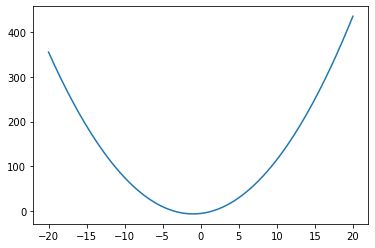

In [45]:
plt.plot(x,y)

In [46]:
df = pd.DataFrame({
    "x": x,
    "y": y,
})

In [47]:
df

,x,y
0,-20.000000,355.000000
1,-19.731544,344.870727
2,-19.463087,334.885591
3,-19.194631,325.044593
4,-18.926174,315.347732
...,...,...
145,18.926174,391.052430
146,19.194631,401.823116
147,19.463087,412.737940
148,19.731544,423.796901


In [49]:
model.fit(df[["x"]],df["y"])

LinearRegression()

In [50]:
model.coef_

array([2.])

In [51]:
model.intercept_

130.12304250559285

In [53]:
df["predict"] = model.predict(df[["x"]])

In [54]:
df

,x,y,predict
0,-20.000000,355.000000,90.123043
1,-19.731544,344.870727,90.659955
2,-19.463087,334.885591,91.196868
3,-19.194631,325.044593,91.733781
4,-18.926174,315.347732,92.270694
...,...,...,...
145,18.926174,391.052430,167.975391
146,19.194631,401.823116,168.512304
147,19.463087,412.737940,169.049217
148,19.731544,423.796901,169.586130


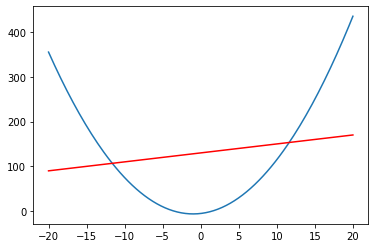

In [56]:
plt.plot(df["x"],df["y"])
plt.plot(df["x"],df["predict"],color="red")

In [57]:
df["x2"] = df["x"]**2

In [58]:
df

,x,y,predict,x2
0,-20.000000,355.000000,90.123043,400.000000
1,-19.731544,344.870727,90.659955,389.333814
2,-19.463087,334.885591,91.196868,378.811765
3,-19.194631,325.044593,91.733781,368.433854
4,-18.926174,315.347732,92.270694,358.200081
...,...,...,...,...
145,18.926174,391.052430,167.975391,358.200081
146,19.194631,401.823116,168.512304,368.433854
147,19.463087,412.737940,169.049217,378.811765
148,19.731544,423.796901,169.586130,389.333814


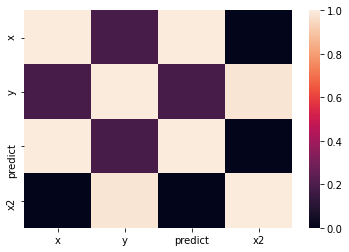

In [60]:
sns.heatmap(df.corr())

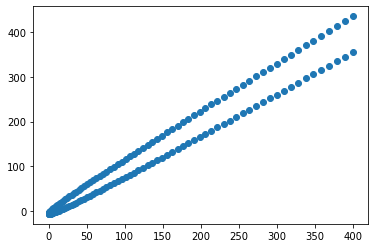

In [61]:
plt.scatter(df["x2"],df["y"])

In [62]:
model.fit(df[["x","x2"]],df["y"])

LinearRegression()

In [63]:
model.coef_

array([2., 1.])

In [64]:
model.intercept_

-5.0

In [65]:
df["pred"] = model.predict(df[["x","x2"]])

In [66]:
df

,x,y,predict,x2,pred
0,-20.000000,355.000000,90.123043,400.000000,355.000000
1,-19.731544,344.870727,90.659955,389.333814,344.870727
2,-19.463087,334.885591,91.196868,378.811765,334.885591
3,-19.194631,325.044593,91.733781,368.433854,325.044593
4,-18.926174,315.347732,92.270694,358.200081,315.347732
...,...,...,...,...,...
145,18.926174,391.052430,167.975391,358.200081,391.052430
146,19.194631,401.823116,168.512304,368.433854,401.823116
147,19.463087,412.737940,169.049217,378.811765,412.737940
148,19.731544,423.796901,169.586130,389.333814,423.796901


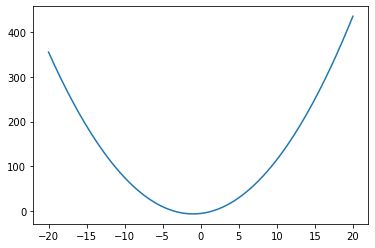

In [69]:
plt.plot(df["x"],df["y"])
#plt.plot(df["x"],df["pred"],color="red")